In [33]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math
import timeit

In [34]:
iris = load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['Labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
pd.unique(data['Labels'])

array([0, 1, 2])

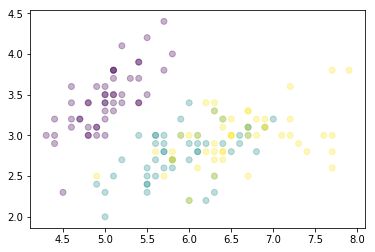

In [46]:
plt.scatter(data['Sepal Length'],data['Sepal Width'],c=data['Labels'],alpha=0.3)
plt.show()

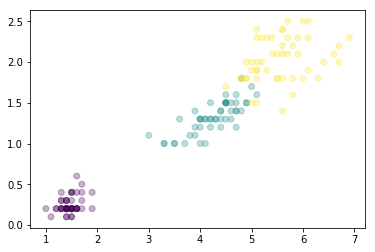

In [47]:
plt.scatter(data['Petal Length'],data['Petal Width'],c=data['Labels'],alpha=0.3)
plt.show()

In [42]:
ks = range(1,10)
inertias_sepal = list()

for k in ks:
    model = KMeans(n_clusters=k,algorithm='auto')
    model.fit(data[['Sepal Length','Sepal Width']])
    inertias_sepal.append(round(model.inertia_,2))

inertias_sepal # 응집도 모아둔 리스트

[130.48, 58.2, 37.05, 27.99, 21.15, 17.43, 14.96, 12.87, 11.21]

In [43]:
ks = range(1,10)
inertias_petal = list()

for k in ks:
    model = KMeans(n_clusters=k,algorithm='auto')
    model.fit(data[['Petal Length','Petal Width']])
    inertias_petal.append(round(model.inertia_,2))

inertias_petal # 응집도 모아둔 리스트

[550.9, 86.39, 31.37, 19.47, 13.98, 11.06, 9.19, 7.68, 6.56]

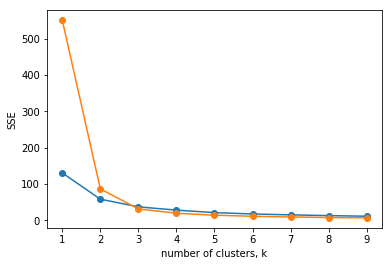

In [44]:
# plot ks vs inertia
plt.plot(ks,inertias_sepal,'-o',label='Sepal')
plt.plot(ks,inertias_petal,'-o',label='Petal')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()